In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# load data
df_weather = pd.read_csv('london_weather_MODIFIED.csv')
df_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
#Add a datetime column based on the string in the "date" column
df_weather['datetime'] = pd.to_datetime(df_weather['date'])
df_weather.head(3)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1970-01-01 00:00:00.019790101
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1970-01-01 00:00:00.019790102
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1970-01-01 00:00:00.019790103


In [4]:
#set index
df_weather = df_weather.set_index('datetime')
df_weather.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1970-01-01 00:00:00.019790101 to 1970-01-01 00:00:00.020201231
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


In [5]:
#Convert the date column to datetime dtype
df_weather['date'] = pd.to_datetime(df_weather['date'], format = '%Y%m%d')

In [7]:
#set index to datetime
df_weather = df_weather.set_index('date')
df_weather

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [8]:
# Filter out the requried data
df_weather = df_weather.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df_weather.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [9]:
#Impute missing temp values using interpolation as this will average the day before and day after information
df_weather['mean_temp'] = df_weather['mean_temp'].interpolate()
df_weather['min_temp'] = df_weather['min_temp'].interpolate()
df_weather['max_temp'] = df_weather['max_temp'].interpolate()
df_weather['snow_depth'] = df_weather['snow_depth'].interpolate()
df_weather['precipitation'] = df_weather['precipitation'].interpolate()



In [11]:
#check to verify NAs have been imputed
df_weather.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Answer the Questions with Visualizations

- What month had the most precipitation between 2000 through 2010?


In [29]:
#Create temporary df of data from 2000-2010
cols = ['precipitation']
pre_df = df_weather.loc[: '2010', pre_cols]
pre_df



,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [30]:
#Resample to monthly frequency
pre_df_MS = pre_df.resample("MS").sum()
pre_df_MS

,precipitation
date,
2000-01-01,14.5
2000-02-01,64.8
2000-03-01,13.9
2000-04-01,82.5
2000-05-01,78.0
...,...
2010-08-01,92.4
2010-09-01,44.6
2010-10-01,63.1


In [34]:
#Find date and corresponding value for max precipitation
date_max_precip = precipitation_df_MS['precipitation'].idxmax()
max_precip = precipitation_df_MS['precipitation'].max()



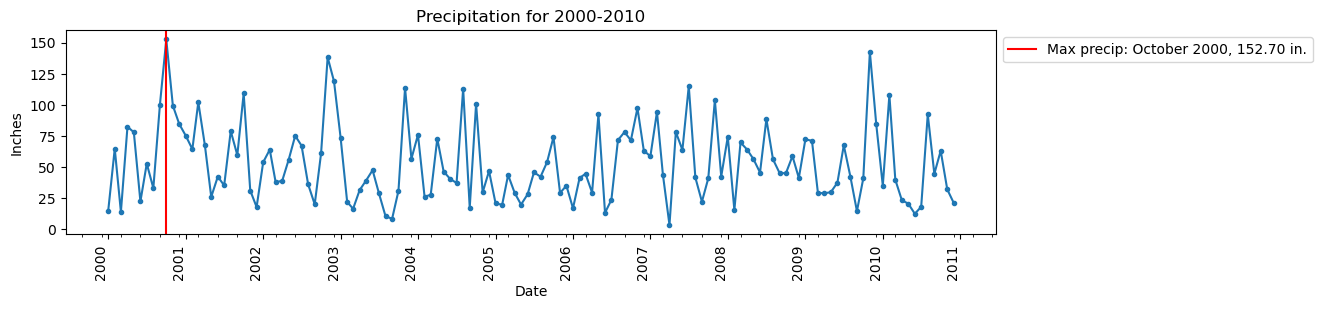

In [35]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Plot precipitation data
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(pre_df_MS, marker = '.')
ax.set(title = 'Precipitation for 2000-2010', ylabel = 'Inches', xlabel = 'Date')

#Set major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.MonthLocator(interval = 3)

ax.xaxis.set_minor_locator(minor_loc)

#Add vertical line for top precipitation
ax.axvline(date_max_precip, color = 'red', 
           label = f"Max precip: {date_max_precip.strftime('%B %Y')}, {max_precip:,.2f} in.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);

- Which year between 2000-2020 had the coolest average temperature?

In [37]:
#Create temporary df 
cols = ['mean_temp']
cols = df_weather.loc['2000':, cols]
cols



,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [38]:
#Resample as yearly frequency
df_year = cols.resample("AS").mean()
df_year



,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683
2005-01-01,11.822877
2006-01-01,12.290822
2007-01-01,11.944384
2008-01-01,11.326776


In [40]:
# Find date and value of lowest average temperature
date_lowest_avg_temp = df_year['mean_temp'].idxmin()
lowest_avg_temp = df_year['mean_temp'].min()


NameError: name 'year_min_temp' is not defined

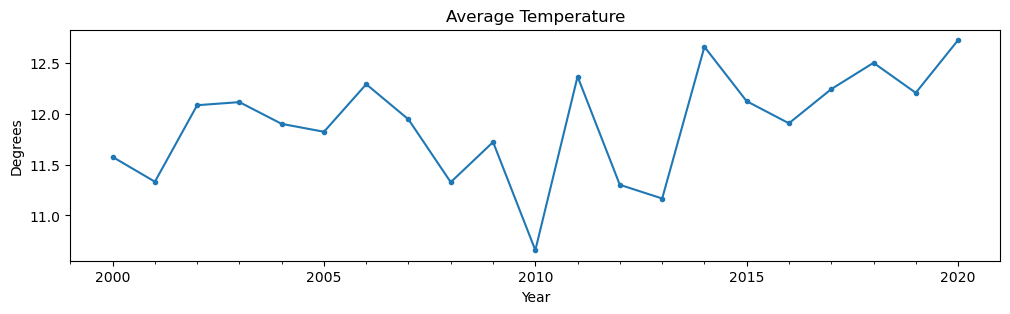

In [41]:
#Plot temperature data
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(df_year, marker = '.')
ax.set(title = 'Average Temperature', ylabel = 'Degrees', xlabel = 'Year')

#Set major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)

#Add vertical line for lowest temp
ax.axvline(year_min_temp, color = 'red', 
           label = f"Min temp: {date_lowest_avg_temp.strftime('%Y')}, {lowest_avg_temp:,.2f} deg.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);